In [32]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [33]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving 05-07-2019-TO-03-07-2020AFFLEALLN.csv to 05-07-2019-TO-03-07-2020AFFLEALLN (1).csv


In [34]:
#Store the data
df = pd.read_csv('05-07-2019-TO-03-07-2020AFFLEALLN.csv')
df = df.set_index(pd.DatetimeIndex(df['Date']))
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-08-08,AFFLE,EQ,08-Aug-2019,745.00,926.00,958.70,750.00,858.00,873.65,886.58,8361975,7.413569e+09,269748,2827035,33.81
2019-08-09,AFFLE,EQ,09-Aug-2019,873.65,844.95,884.90,835.20,844.00,843.05,856.50,674521,5.777245e+08,32268,152274,22.58
2019-08-13,AFFLE,EQ,13-Aug-2019,843.05,849.70,859.70,828.05,830.00,832.85,842.22,191338,1.611496e+08,10362,64804,33.87
2019-08-14,AFFLE,EQ,14-Aug-2019,832.85,833.10,840.30,827.30,835.00,835.15,834.24,103535,8.637284e+07,5284,50940,49.20
2019-08-16,AFFLE,EQ,16-Aug-2019,835.15,822.00,835.00,790.00,804.95,805.90,817.45,62147,5.080210e+07,3286,29730,47.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,AFFLE,EQ,29-Jun-2020,1512.30,1505.00,1508.90,1461.35,1475.00,1480.45,1475.89,30270,4.467522e+07,3733,16364,54.06
2020-06-30,AFFLE,EQ,30-Jun-2020,1480.45,1490.00,1492.85,1456.10,1463.00,1460.25,1472.92,15040,2.215268e+07,2113,9734,64.72
2020-07-01,AFFLE,EQ,01-Jul-2020,1460.25,1460.00,1470.25,1440.05,1455.65,1450.80,1453.56,22048,3.204819e+07,3885,12969,58.82


In [38]:

df.rename(columns = {'Close Price':'Close'}, inplace=True)
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-08-08,AFFLE,EQ,08-Aug-2019,745.00,926.00,958.70,750.00,858.00,873.65,886.58,8361975,7.413569e+09,269748,2827035,33.81
2019-08-09,AFFLE,EQ,09-Aug-2019,873.65,844.95,884.90,835.20,844.00,843.05,856.50,674521,5.777245e+08,32268,152274,22.58
2019-08-13,AFFLE,EQ,13-Aug-2019,843.05,849.70,859.70,828.05,830.00,832.85,842.22,191338,1.611496e+08,10362,64804,33.87
2019-08-14,AFFLE,EQ,14-Aug-2019,832.85,833.10,840.30,827.30,835.00,835.15,834.24,103535,8.637284e+07,5284,50940,49.20
2019-08-16,AFFLE,EQ,16-Aug-2019,835.15,822.00,835.00,790.00,804.95,805.90,817.45,62147,5.080210e+07,3286,29730,47.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,AFFLE,EQ,29-Jun-2020,1512.30,1505.00,1508.90,1461.35,1475.00,1480.45,1475.89,30270,4.467522e+07,3733,16364,54.06
2020-06-30,AFFLE,EQ,30-Jun-2020,1480.45,1490.00,1492.85,1456.10,1463.00,1460.25,1472.92,15040,2.215268e+07,2113,9734,64.72
2020-07-01,AFFLE,EQ,01-Jul-2020,1460.25,1460.00,1470.25,1440.05,1455.65,1450.80,1453.56,22048,3.204819e+07,3885,12969,58.82


In [ ]:
df.columns = [Date, Symbol	Series	Date	Prev Close	Open Price	High Price	Low Price	Last Price	Close Price	Average Price	Total Traded Quantity	Turnover	No. of Trades	Deliverable Qty	% Dly Qt to Traded Qty]

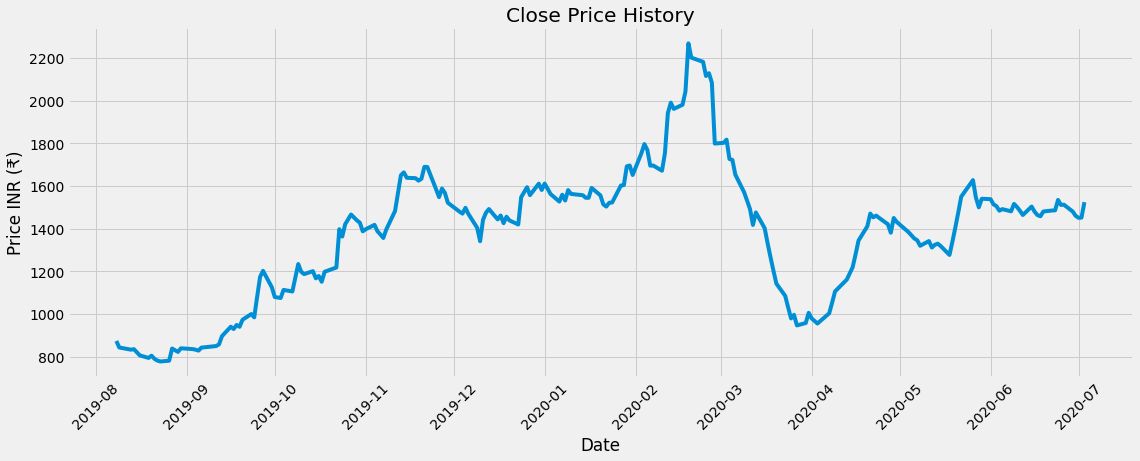

In [49]:
#Visualize the Stock Price
plt.figure(figsize = (17, 6))
plt.plot(df['Close'], label = 'Close')
plt.xticks(rotation = 45)
plt.title("Close Price History")
plt.xlabel('Date')
plt.ylabel("Price INR (₹)")
plt.show()

In [50]:
#Calculate the MACD and signal line
#Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust = False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD Line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span = 9, adjust=False).mean()



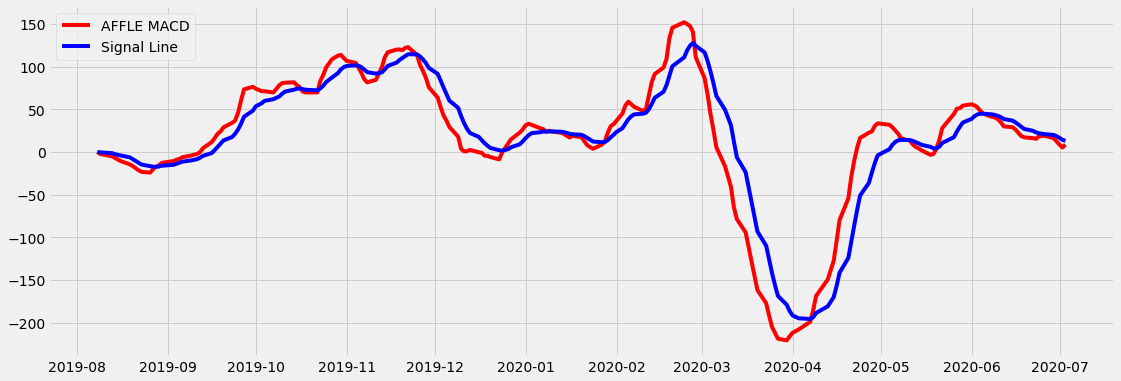

In [51]:
#plot the figure
plt.figure(figsize=(17,6))
plt.plot(df.index, MACD, label = 'AFFLE MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color = 'blue')
plt.legend(loc = 'upper left')
plt.show()

In [52]:
#Create new columns for new data
df['MACD'] = MACD
df['Signal Line'] = signal

df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,,,,,,,,
2019-08-08,AFFLE,EQ,08-Aug-2019,745.00,926.00,958.70,750.00,858.00,873.65,886.58,8361975,7.413569e+09,269748,2827035,33.81,0.000000,0.000000,NaN,NaN
2019-08-09,AFFLE,EQ,09-Aug-2019,873.65,844.95,884.90,835.20,844.00,843.05,856.50,674521,5.777245e+08,32268,152274,22.58,-2.441026,-0.488205,NaN,843.05
2019-08-13,AFFLE,EQ,13-Aug-2019,843.05,849.70,859.70,828.05,830.00,832.85,842.22,191338,1.611496e+08,10362,64804,33.87,-5.139367,-1.418438,NaN,NaN
2019-08-14,AFFLE,EQ,14-Aug-2019,832.85,833.10,840.30,827.30,835.00,835.15,834.24,103535,8.637284e+07,5284,50940,49.20,-7.011409,-2.537032,NaN,NaN
2019-08-16,AFFLE,EQ,16-Aug-2019,835.15,822.00,835.00,790.00,804.95,805.90,817.45,62147,5.080210e+07,3286,29730,47.84,-10.731539,-4.175933,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,AFFLE,EQ,29-Jun-2020,1512.30,1505.00,1508.90,1461.35,1475.00,1480.45,1475.89,30270,4.467522e+07,3733,16364,54.06,16.219853,19.913089,NaN,NaN
2020-06-30,AFFLE,EQ,30-Jun-2020,1480.45,1490.00,1492.85,1456.10,1463.00,1460.25,1472.92,15040,2.215268e+07,2113,9734,64.72,12.344295,18.399330,NaN,NaN
2020-07-01,AFFLE,EQ,01-Jul-2020,1460.25,1460.00,1470.25,1440.05,1455.65,1450.80,1453.56,22048,3.204819e+07,3885,12969,58.82,8.413367,16.402137,NaN,NaN


In [53]:
#Create a signal to when to buy and sell an assert
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [54]:
#Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [55]:
#Show the data
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,,,,,,,,
2019-08-08,AFFLE,EQ,08-Aug-2019,745.00,926.00,958.70,750.00,858.00,873.65,886.58,8361975,7.413569e+09,269748,2827035,33.81,0.000000,0.000000,NaN,NaN
2019-08-09,AFFLE,EQ,09-Aug-2019,873.65,844.95,884.90,835.20,844.00,843.05,856.50,674521,5.777245e+08,32268,152274,22.58,-2.441026,-0.488205,NaN,843.05
2019-08-13,AFFLE,EQ,13-Aug-2019,843.05,849.70,859.70,828.05,830.00,832.85,842.22,191338,1.611496e+08,10362,64804,33.87,-5.139367,-1.418438,NaN,NaN
2019-08-14,AFFLE,EQ,14-Aug-2019,832.85,833.10,840.30,827.30,835.00,835.15,834.24,103535,8.637284e+07,5284,50940,49.20,-7.011409,-2.537032,NaN,NaN
2019-08-16,AFFLE,EQ,16-Aug-2019,835.15,822.00,835.00,790.00,804.95,805.90,817.45,62147,5.080210e+07,3286,29730,47.84,-10.731539,-4.175933,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,AFFLE,EQ,29-Jun-2020,1512.30,1505.00,1508.90,1461.35,1475.00,1480.45,1475.89,30270,4.467522e+07,3733,16364,54.06,16.219853,19.913089,NaN,NaN
2020-06-30,AFFLE,EQ,30-Jun-2020,1480.45,1490.00,1492.85,1456.10,1463.00,1460.25,1472.92,15040,2.215268e+07,2113,9734,64.72,12.344295,18.399330,NaN,NaN
2020-07-01,AFFLE,EQ,01-Jul-2020,1460.25,1460.00,1470.25,1440.05,1455.65,1450.80,1453.56,22048,3.204819e+07,3885,12969,58.82,8.413367,16.402137,NaN,NaN


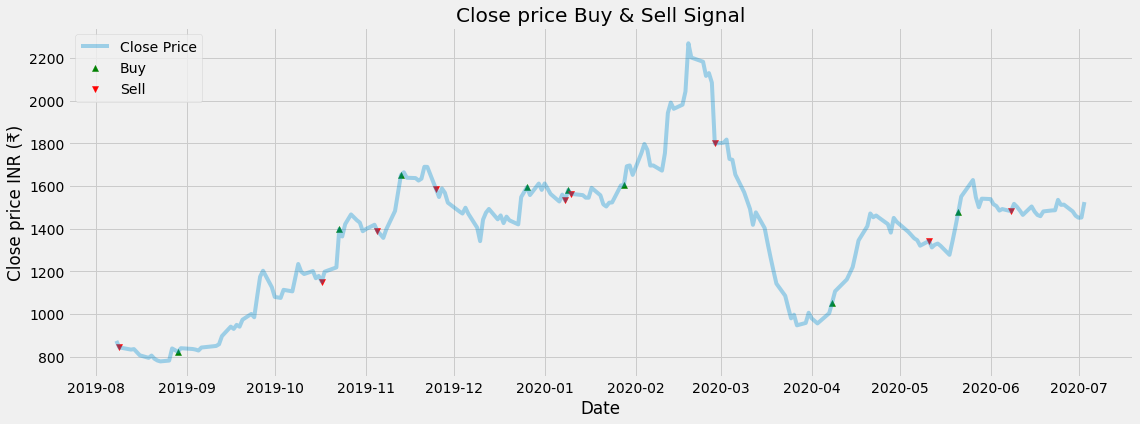

In [56]:
#Visualize the buy and sell signal

plt.figure(figsize=(17,6))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close price Buy & Sell Signal')
plt.xlabel("Date")
plt.ylabel("Close price INR (₹)")
plt.legend(loc='upper left')
plt.show()